In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from collections import defaultdict
import re
import ast

In [4]:
df = pd.read_csv('business_features.csv')

In [5]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ing_mod,cuisine
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",specialti food restaur dim sum import food foo...,chines
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",sushi bar restaur japanes,japanes
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",restaur breakfast brunch mexican taco texmex f...,breakfast
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",italian restaur pizza chicken wing,italian
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",mexican restaur patisseriecak shop food bar ni...,mexican


In [6]:
attributes_dict = defaultdict(int)
df['attributes'] = df['attributes'].apply(ast.literal_eval)

In [7]:
for i in df['attributes']:
    for j in i.keys():
        attributes_dict[j] += 1

In [14]:
sorted([(val, key) for key, val in attributes_dict.items()], reverse = True)

[(32613, 'RestaurantsTakeOut'),
 (32201, 'RestaurantsPriceRange2'),
 (32016, 'RestaurantsReservations'),
 (31928, 'RestaurantsGoodForGroups'),
 (31857, 'GoodForKids'),
 (31603, 'RestaurantsDelivery'),
 (30874, 'OutdoorSeating'),
 (30644, 'RestaurantsAttire'),
 (30426, 'BusinessParking'),
 (29794, 'Ambience'),
 (29714, 'HasTV'),
 (28977, 'Alcohol'),
 (28014, 'WiFi'),
 (27438, 'NoiseLevel'),
 (26886, 'BikeParking'),
 (24366, 'Caters'),
 (22073, 'GoodForMeal'),
 (21468, 'BusinessAcceptsCreditCards'),
 (13047, 'RestaurantsTableService'),
 (6543, 'WheelchairAccessible'),
 (3477, 'DogsAllowed'),
 (3098, 'Music'),
 (3082, 'HappyHour'),
 (2833, 'GoodForDancing'),
 (2748, 'BusinessAcceptsBitcoin'),
 (2427, 'DriveThru'),
 (2238, 'BestNights'),
 (2155, 'CoatCheck'),
 (2007, 'Smoking'),
 (1010, 'BYOBCorkage'),
 (669, 'ByAppointmentOnly'),
 (468, 'Corkage'),
 (115, 'AcceptsInsurance'),
 (44, 'DietaryRestrictions'),
 (26, 'BYOB'),
 (25, 'AgesAllowed'),
 (10, 'RestaurantsCounterService'),
 (5, 'Open2

In [193]:
sns.set_style('darkgrid')

Text(0.5, 0, 'Category')

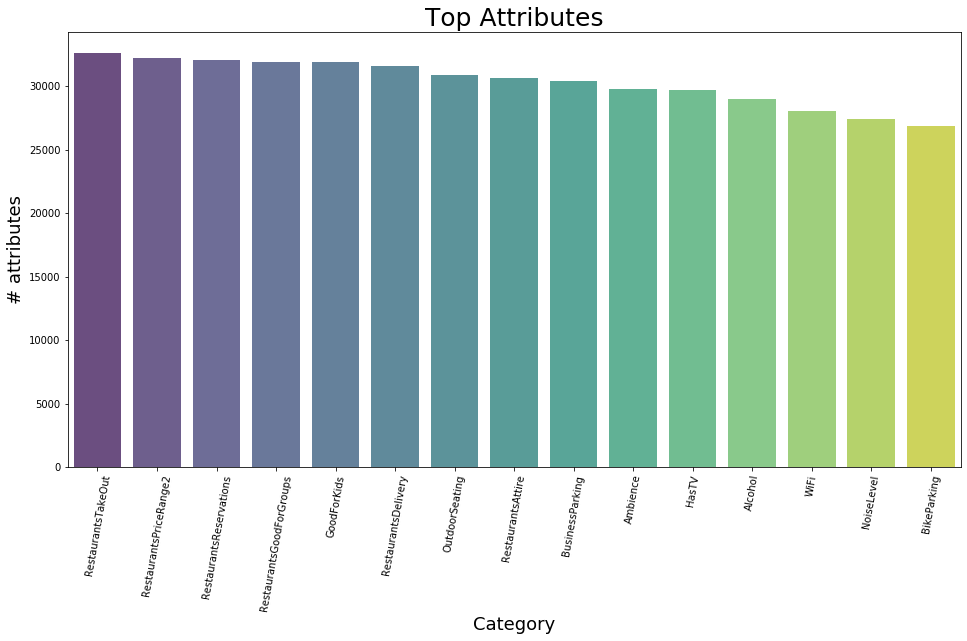

In [12]:
#prep for chart
x=sorted([(val, key) for key, val in attributes_dict.items()], reverse = True)
x=x[0:15]

x = pd.DataFrame(x, columns=['Count', 'Attributes'])


#chart
plt.figure(figsize=(16,8))
ax = sns.barplot(x['Attributes'], x['Count'], alpha=0.8, palette="viridis")#,color=color[5])
plt.title("Top Attributes",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# attributes', fontsize=18)
plt.xlabel('Category', fontsize=18)
#plt.savefig('plots/category.png')

In [14]:
pd.DataFrame(x, columns=['Count', 'Attributes'])

,Count,Attributes
0,32613,RestaurantsTakeOut
1,32201,RestaurantsPriceRange2
2,32016,RestaurantsReservations
3,31928,RestaurantsGoodForGroups
4,31857,GoodForKids
5,31603,RestaurantsDelivery
6,30874,OutdoorSeating
7,30644,RestaurantsAttire
8,30426,BusinessParking
9,29794,Ambience


In [15]:
len(df)

34655

In [117]:
for i in df['attributes']:
    for j in i.keys():
        if j == 'Ambience':
            i['Ambience'] = ast.literal_eval(i['Ambience'])

In [154]:
# RestaurantsTakeOut : True/False
# RestaurantsPriceRange2 : {'1', '2', '3', '4', 'None'}
# RestaurantsReservations : {'False', 'None', 'True'}
# RestaurantsGoodForGroups : {'False', 'None', 'True'}
# GoodForKids : {'False', 'None', 'True'}
# RestaurantsDelivery: {'False', 'None', 'True'}
# OutdoorSeating : {'False', 'None', 'True'}
# RestaurantsAttire : {"'casual'", "'dressy'","'formal'", 'None', "u'casual'", "u'dressy'", "u'formal'"}
# WiFi : {"'free'", "'no'", "'paid'", 'None', "u'free'", "u'no'", "u'paid'"}
# Alcohol: {"'beer_and_wine'", "'full_bar'", "'none'", 'None', "u'beer_and_wine'", "u'full_bar'", "u'none'"}



range_val = set()
for i in df['attributes']:
    for j in i.keys():
        if j == 'Alcohol': #and i['Ambience']:
            #for n in i['Ambience'].keys():
            #    range_val.add(n)
            range_val.add(i['Alcohol'])

In [155]:
range_val

{"'beer_and_wine'",
 "'full_bar'",
 "'none'",
 'None',
 "u'beer_and_wine'",
 "u'full_bar'",
 "u'none'"}

In [135]:
ambience_type = ('casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic', 'touristy', 'trendy', 'upscale')

def amb_fn(x, mystr):
    for j in x.keys():
        if j == mystr and x[mystr]:
            return_list = []
            for a in ambience_type:
                if a in x[mystr].keys() and x[mystr][a]:
                    return_list.append(a)
                    
            if len(return_list) >= 1:
                return return_list
    return 0

df['attributes'].apply(lambda x:amb_fn(x,'Ambience'))

0         [casual]
1         [casual]
2                0
3                0
4         [casual]
           ...    
34650     [casual]
34651            0
34652            0
34653            0
34654    [upscale]
Name: attributes, Length: 34655, dtype: object

In [118]:
#Ambience
flag = True
for i in df['attributes']:
    for j in i.keys():
        if j == 'Ambience' and flag:
            print(i['Ambience'].keys())
            flag = False
            break

dict_keys(['romantic', 'intimate', 'classy', 'hipster', 'divey', 'touristy', 'trendy', 'upscale', 'casual'])


In [35]:
def dummy_fn(x, mystr):
    for j in x.keys():
        if j == mystr and x[j] == 'None':
            return 0
        elif j == mystr and x[j] == 'True':
            return 1
        else:
            return 0

In [32]:
def dummy_fn_price(x, mystr):
    for j in x.keys():
        if j == mystr and x[j] == 'None':
            return 0
        elif j == mystr and x[j]:
            return int(x[j])
        else:
            return 0

In [95]:
def dummy_fn_ra(x, mystr):
    for j in x.keys():
        if j == mystr and x[j] == 'None':
            return 0
        elif j == mystr and len(re.findall('casual',x[j])) >= 1:
            if re.findall('casual',x[j])[0] == 'casual':
                return 'casual'
        elif j == mystr and len(re.findall('dressy', x[j])) >= 1:
            if re.findall('dressy', x[j])[0] == 'dressy':
                return 'dressy'
        elif j == mystr and len(re.findall('formal',x[j])) >= 1:
            if re.findall('formal',x[j])[0] == 'formal':
                return 'formal'
        else:
            return 0

In [90]:
def dummy_fn_wifi(x, mystr):
    for j in x.keys():
        if j == mystr and x[j] == 'None':
            return 0
        # re.findall('no',i[j])
        elif j == mystr and len(re.findall('free',x[j])) >= 1:
            if re.findall('free',x[j])[0] == 'free':
                return 'free'
        elif j == mystr and len(re.findall('paid',x[j])) >= 1:
            if re.findall('paid',x[j])[0] == 'paid':
                return 'paid'
        else:
            return 0

In [156]:
# Alcohol: {"'beer_and_wine'", "'full_bar'", "'none'", 'None', "u'beer_and_wine'", "u'full_bar'", "u'none'"}
def dummy_fn_alcohol(x, mystr):
    for j in x.keys():
        if j == mystr and x[j] == 'None':
            return 0
        # re.findall('no',i[j])
        elif j == mystr and len(re.findall('beer_and_wine',x[j])) >= 1:
            if re.findall('beer_and_wine',x[j])[0] == 'beer_and_wine':
                return 'beer_and_wine'
        elif j == mystr and len(re.findall('full_bar',x[j])) >= 1:
            if re.findall('full_bar',x[j])[0] == 'full_bar':
                return 'full_bar'
        else:
            return 0

In [53]:
df['attributes'].apply(lambda x:dummy_fn_wifi(x,'WiFi'))

0        0
1        0
2        0
3        0
4        0
        ..
34650    0
34651    0
34652    0
34653    0
34654    0
Name: attributes, Length: 34655, dtype: int64

In [28]:
df['RestaurantsTakeOut'] = df['attributes'].apply(lambda x:dummy_fn(x,'RestaurantsTakeOut'))

In [34]:
df['RestaurantsPriceRange2'] = df['attributes'].apply(lambda x:dummy_fn_price(x,'RestaurantsPriceRange2'))

In [39]:
df['RestaurantsReservations'] = df['attributes'].apply(lambda x:dummy_fn(x,'RestaurantsReservations'))

In [43]:
df['RestaurantsGoodForGroups'] = df['attributes'].apply(lambda x:dummy_fn(x,'RestaurantsGoodForGroups'))

In [45]:
df['GoodForKids'] = df['attributes'].apply(lambda x:dummy_fn(x,'GoodForKids'))

In [47]:
df['RestaurantsDelivery'] = df['attributes'].apply(lambda x:dummy_fn(x,'RestaurantsDelivery'))

In [96]:
df['RestaurantsAttire'] = df['attributes'].apply(lambda x:dummy_fn_ra(x,'RestaurantsAttire'))

In [91]:
df['WiFi'] = df['attributes'].apply(lambda x:dummy_fn_wifi(x,'WiFi'))

In [136]:
df['Ambience'] = df['attributes'].apply(lambda x:amb_fn(x,'Ambience'))

In [157]:
df['Alcohol'] = df['attributes'].apply(lambda x:dummy_fn_alcohol(x,'Alcohol'))

In [92]:
for i in df['attributes']:
    for j in i.keys():
        if j == 'WiFi':
            #print(re.findall('no',i[j]))
            if i[j] == "free":
                #print('free')

SyntaxError: unexpected EOF while parsing (<ipython-input-92-24c6a213e2bb>, line 6)

<re.Match object; span=(0, 2), match='no'>

In [160]:
df[df['Alcohol'] != 0]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,Alcohol
7,BvYU3jvGd0TJ7IyZdfiN2Q,Manzetti's Tavern,6401 Morrison Blvd,Charlotte,NC,28211,35.156338,-80.831878,3.5,16,...,0,0,0,0,0,0,0,0,0,full_bar
8,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,0,0,0,0,0,0,0,0,0,full_bar
44,VA232TY-ThR8L5wjuuLZVg,Sofra Mediterranean Cuisine,"380 Tower Hill Road, Units 23-24-25",Richmond Hill,ON,L4E 0T8,43.913723,-79.473839,3.0,33,...,1,0,0,0,0,0,0,0,0,full_bar
49,dUffgo9Lh_Vk9TLuFR5ywg,Oregano's Pizza Bistro,1008 E Camelback Rd,Phoenix,AZ,85014,33.509510,-112.060238,3.5,563,...,1,0,0,0,0,0,0,0,0,full_bar
51,iyPtSR0s6EkvaQFbdJ_jVA,Pearl King,291 King Street W,Toronto,ON,M5V 1J5,43.646478,-79.390019,2.5,72,...,1,0,0,0,0,0,0,0,0,full_bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34413,dk-aAtoIkGHprL3n4XQrkg,WilderNest Dream Cafe,1309 9th Avenue SE,Calgary,AB,T2G 0T3,51.040941,-114.033794,3.0,13,...,0,0,0,0,0,0,0,0,0,full_bar
34562,RUIaxP7OyjU7F0gjVcrsbQ,Timehri Int Restaurant,3300 McNicoll Avenue,Scarborough,ON,M1V 5J6,43.820678,-79.261897,3.5,7,...,0,0,0,0,0,0,0,0,0,full_bar
34564,1_02wXxt7euom-9hWZeReA,Queen Park Social,4125 Yancey Rd,Charlotte,NC,28217,35.186857,-80.880757,3.5,176,...,1,0,0,1,0,0,0,1,0,full_bar
34595,_Y0SbKocq7yoV8f5_fSyaA,Rocky River Grille,5400 John Q Hammons Dr NW,Concord,NC,28027,35.365323,-80.701516,3.0,59,...,0,0,0,0,0,0,0,0,0,full_bar


In [73]:
df[df['RestaurantsPriceRange2'] == 1]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,ing_mod,cuisine,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsGoodForGroups,GoodForKids,RestaurantsDelivery,RestaurantsAttire,WiFi
24,Kxbn0XLcCgQqmkdIkhuOeQ,Not Your Mother,"1346 Queen Street, Unit 2",Toronto,ON,M6K 1L4,43.641708,-79.432192,4.0,8,...,dessert ice cream frozen yogurt food restaur v...,vegan,0,1,0,0,0,0,0,0
74,Mq6qiz-Bxgd8VE6tBwCuUg,Starbucks,190 Queen Street E,Brampton,ON,L6W 2B3,43.693769,-79.752138,4.5,5,...,restaur breakfast brunch food coffe tea,breakfast,0,1,0,0,0,0,0,0
142,WZe-1SFcErsOT7gZY_x6wQ,Denny's,14799 W Grand Ave,Surprise,AZ,85374,33.658900,-112.376868,2.5,57,...,restaur diner breakfast brunch american tradit,breakfast,0,1,0,0,0,0,0,0
218,0DapwcHS0YWNeHKptURSCA,Break Time Bar and Grill,15200 Brookpark Rd,Cleveland,OH,44135,41.418801,-81.803409,2.5,3,...,american tradit restaur bar nightlif,american,0,1,0,0,0,0,0,0
221,PF5rHGGZ93i7UJP9Fsvgmg,McDonald's,8452 W Thunderbird,Peoria,AZ,85381,33.610429,-112.240870,2.0,32,...,fast food coffe tea restaur burger food,burger,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34433,3wGsvZj5-_YtM-4D4JndDQ,Sunny's Diner,1825 E University Dr,Tempe,AZ,85281,33.421719,-111.908726,4.0,286,...,american tradit greek breakfast brunch restaur,american,0,1,0,0,0,0,0,0
34479,uBZq-ny6OgE2_J4ejH6OUg,Shakes & Cones,7215 E 1st St,Scottsdale,AZ,85251,33.492075,-111.925718,4.5,199,...,restaur ice cream frozen yogurt food dessert c...,american,0,1,0,0,0,0,0,0
34554,RMLdpPgaYUsa9LIS7UnTNQ,Petite Thuet,244 King Street E,Toronto,ON,M5A 1K2,43.651585,-79.367377,3.5,9,...,food dessert french restaur coffe tea,french,0,1,0,0,0,0,0,0
34622,m1krp3dyJorAbV0HQC-TRQ,Urban Campfire,921 E University Dr,Tempe,AZ,85281,33.422014,-111.925817,3.5,7,...,american tradit restaur,american,0,1,0,0,0,0,0,0


In [98]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ing_mod', 'cuisine',
       'RestaurantsTakeOut', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids',
       'RestaurantsDelivery', 'RestaurantsAttire', 'WiFi'],
      dtype='object')

In [151]:
df['Ambience'].apply(lambda x:dummy_amb(x, 'casual'))

0        1
1        1
2        0
3        0
4        1
        ..
34650    1
34651    0
34652    0
34653    0
34654    0
Name: Ambience, Length: 34655, dtype: int64

In [150]:
def dummy_amb(x, amb):
    if x and len(x) >= 1:
        for i in x:
            if i == amb:
                return 1
    return 0

In [152]:
ambience_type = ('casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic', 'touristy', 'trendy', 'upscale')

for amb in ambience_type:
    df[amb] = df['Ambience'].apply(lambda x:dummy_amb(x, amb))

In [159]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,Alcohol
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,...,1,0,0,0,0,0,0,0,0,0
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,1,0,0,0,0,0,0,0,0,0
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,...,0,0,0,0,0,0,0,0,0,0
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,...,0,0,0,0,0,0,0,0,0,0
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,...,1,0,0,0,0,0,0,0,0,0


In [163]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ing_mod', 'cuisine',
       'RestaurantsTakeOut', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids',
       'RestaurantsDelivery', 'RestaurantsAttire', 'WiFi', 'Ambience',
       'casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale', 'Alcohol'],
      dtype='object')

In [165]:
972/len(df)

0.028047900735824555

## Checking for more than one location

In [166]:
branch_num = defaultdict(int)

In [169]:
for i in df['name']:
    branch_num[i] += 1

In [175]:
sorted([(val, key) for key, val in branch_num.items()], reverse = True)[:25]

[(716, "McDonald's"),
 (263, 'Taco Bell'),
 (176, 'Chipotle Mexican Grill'),
 (139, 'Panda Express'),
 (137, 'Burger King'),
 (110, "Denny's"),
 (109, 'Pizza Hut'),
 (102, 'Panera Bread'),
 (98, 'Five Guys'),
 (90, 'Sonic Drive-In'),
 (87, "Wendy's"),
 (85, 'Starbucks'),
 (80, 'Swiss Chalet Rotisserie & Grill'),
 (75, 'Popeyes Louisiana Kitchen'),
 (74, "Applebee's Grill + Bar"),
 (70, 'IHOP'),
 (63, 'Buffalo Wild Wings'),
 (63, 'A&W'),
 (61, 'Pizza Pizza'),
 (59, 'Tim Hortons'),
 (59, "Filiberto's Mexican Food"),
 (47, 'El Pollo Loco'),
 (47, "Chili's"),
 (45, 'Olive Garden Italian Restaurant'),
 (44, 'Smashburger')]

In [177]:
df['no_of_rest'] = df['name'].apply(lambda x:branch_num[x])

In [178]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,Alcohol,no_of_rest
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,...,0,0,0,0,0,0,0,0,0,1
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,0,0,0,0,0,0,0,0,0,1
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,...,0,0,0,0,0,0,0,0,0,263
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,...,0,0,0,0,0,0,0,0,0,7
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,...,0,0,0,0,0,0,0,0,0,1


(array([32314.,  1186.,   176.,   263.,     0.,     0.,     0.,     0.,
            0.,   716.]),
 array([  1. ,  72.5, 144. , 215.5, 287. , 358.5, 430. , 501.5, 573. ,
        644.5, 716. ]),
 <a list of 10 Patch objects>)

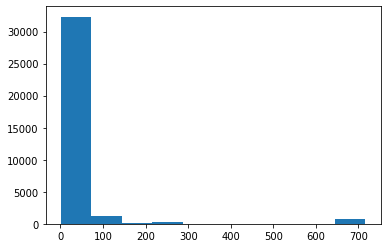

In [185]:
plt.hist(df['no_of_rest'])